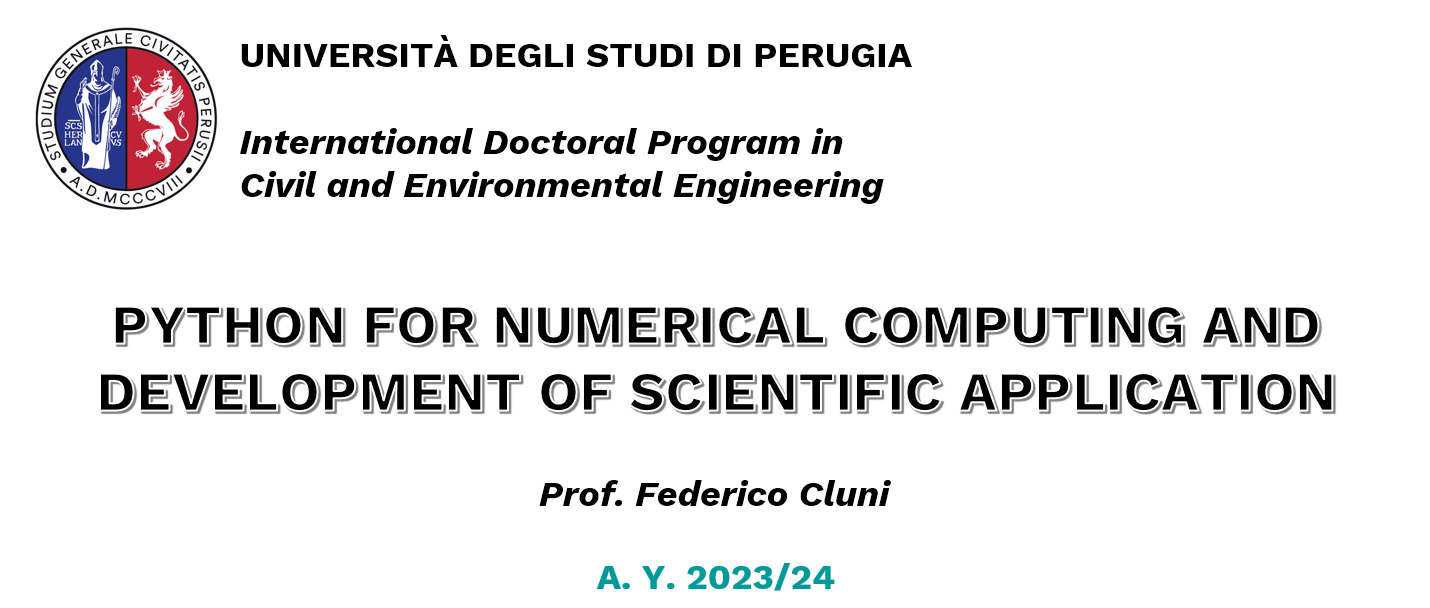

# Lesson #5 - March 22nd, 2024
<hr>

The examples are adapted from:

R. Johansson, "Numerical Python: Scientific Computing and Data Science Applications With Numpy, Scipy and Matplotlib", Apress, 2018

In Python there is a module to perform symbolic computing, which gives Python the possibility of a Computer Algebra System (CAS).
Moreover, the usual syntax of Python is available, so complex task are possibible with easyness.

In [1]:
import sympy

In [2]:
from sympy import I, pi, oo

Sympy defines an new object, the <b style="color:CadetBlue">Symbol</b>

In [3]:
x = sympy.Symbol("x")

In [4]:
y = sympy.Symbol("y", real=True)

In [5]:
y.is_real

True

In [6]:
print(x.is_real)

None


Why add atribute? This can lead to simplification of expressions

In [7]:
y = sympy.Symbol("y", positive=True)

In [8]:
sympy.sqrt(x**2)

sqrt(x**2)

In [9]:
sympy.sqrt(y**2)

y

In [10]:
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)

In [11]:
sympy.cos(n1*pi)

cos(pi*n)

In [12]:
sympy.cos(n2*pi)

(-1)**n

In [13]:
sympy.cos(n3*pi)

-1

If it is necessary to define several symbols, use `symbols`

In [14]:
a, b, c = sympy.symbols("a, b, c")

Note that we can also use `vars`

In [15]:
sympy.var("d, e, f")

(d, e, f)

Anyway, with symbols we can also associate name to particular symbols (for example, greek letters)

In [16]:
X = sympy.Symbol("\\chi")
X

\chi

Moreover, even if it is not suggested, we can also do something like this

In [17]:
a = sympy.Symbol("b")
a

b

Besides Symbols, we also want to use in mathematical expressions: numbers, functions and constants.

## Numbers

We can define integer numbers

In [18]:
i = sympy.Integer(19)

In [19]:
i.is_integer, i.is_real, i.is_odd

(True, True, True)

and floating point numbers

In [20]:
f = sympy.Float(3.2)

In [21]:
f.is_integer, f.is_real, f.is_odd

(False, True, False)

To obtain the correspond Python types

In [22]:
int(i), float(f)

(19, 3.2)

If we have the Python types and we want the corresponding Sympy types

In [23]:
i, f = sympy.sympify(19), sympy.sympify(3.2)

But also

In [24]:
i, f = sympy.S(19), sympy.S(3.2)

In [25]:
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

### Integers

The Integer type represent integers with _arbitrary_ precision!

In [26]:
sympy.factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

By the way, also Python built-in integer type is arbitrary precision (see [here](https://tenthousandmeters.com/blog/python-behind-the-scenes-8-how-python-integers-work/))

In [27]:
import math
math.factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

### Floats

Also Float type has _arbitrary_ precision.
In particular, we can (optionally) specify the precision as the second argument.

In [28]:
f = sympy.Float('0.1',17)

s_sym = sympy.Float('0',17)
s_num = 0.

for j in range(10):
    s_sym = s_sym+f
    s_num = s_num+0.1
print(s_sym)
print(s_num)

1.0000000000000000
0.9999999999999999


Anyway, note that the number *must* be specified as a _string_!

In [29]:
f = sympy.Float(0.1,17)

s_sym = sympy.Float('0',17)
s_num = 0.

for j in range(10):
    s_sym = s_sym+f
    s_num = s_num+0.1
print(s_sym)
print(s_num)

1.0000000000000001
0.9999999999999999


### Rationals

We can define rational numbers and operate with them in usual ways

In [30]:
r1 = sympy.Rational(2,3)
r1

2/3

In [31]:
r2 = sympy.Rational(4,5)
r2

4/5

In [32]:
r1*r2

8/15

In [33]:
r1/r2

5/6

### A note of caution

When mixing numbers and symbols, take care on the order of operation!

In [34]:
3/2*x

1.5*x

In this case, the first operation is `3/2` between _standard_ numbers so the result is `0.5`!

To avoid this

In [35]:
3*x/2

3*x/2

In [36]:
sympy.S(3)/2*x

3*x/2

The command `sympy.S` sympyfy a number or expression.

## Constants and special symbols

We already importe the imaginary unit `I`, the value for $\pi$, `pi`, and the special symbols for infinity, `oo`.

We have also the base of natural logarithm $e$ as `E` and Euler's constant $\gamma$ as `EulerGamma`.

# Functions

Another object defined by Sympy is <b style="color:CadetBlue">Function</b>.

A Function can be:

- applied or unapplied, if the input symbols that represent the domain are defined or not.
- defined or undefined, if the body (the expression) is defined or not.

In [37]:
x, y, z = sympy.symbols("x, y, z")
f = sympy.Function("f")

In [38]:
f.free_symbols

set()

In [39]:
f=f(x)

In [40]:
f.free_symbols

{x}

In [41]:
g = sympy.Function("g")(x,y,z)

In [42]:
g.free_symbols

{x, y, z}

To define a custom funtion, it is possible to sub-class `Function` or, more symply, use the _standard_ way of defining functions in Python.

In [43]:
def sincos(x):
    return sympy.sin(x)*sympy.cos(x)

In [44]:
sincos(x)

sin(x)*cos(x)

In [45]:
sincos(pi/4)

1/2

Lambda function are defined also in Sympy

In [46]:
h = sympy.Lambda(x, x**2)

In [47]:
h(x)

x**2

In [48]:
h(5)

25

# Expressions

Very often, instead of working with function we need to work with <b style="color:CadetBlue">expressions</b>.

As an example, to represent $1+2x^2+3x^3$

In [49]:
expr = 1 + 2*x**2 + 3*x**3
expr

3*x**3 + 2*x**2 + 1

## Manipulating expressions

### Simplification

In [50]:
expr = 2*(x**2-x) - x*(x+1)
expr

2*x**2 - x*(x + 1) - 2*x

In [51]:
sympy.simplify(expr)

x*(x - 3)

In [52]:
expr.simplify()

x*(x - 3)

Note that original expression is not modified

In [53]:
expr

2*x**2 - x*(x + 1) - 2*x

In [54]:
expr = 2*sympy.cos(x)*sympy.sin(x)
expr.simplify()

sin(2*x)

In [55]:
expr = sympy.exp(x)*sympy.exp(y)
expr.simplify()

exp(x + y)

### Expand

In [56]:
expr = (x+1)*(x+2)
expr

(x + 1)*(x + 2)

In [57]:
sympy.expand(expr)

x**2 + 3*x + 2

In [58]:
expr.expand()

x**2 + 3*x + 2

In [59]:
sympy.sin(x+y).expand(trig=True)

sin(x)*cos(y) + sin(y)*cos(x)

In [60]:
a, b = sympy.symbols("a, b", positive=True)
sympy.log(a*b).expand(log=True)

log(a) + log(b)

Note that if we do not define the symbols as positive it does not work!

In [61]:
sympy.log(x*y).expand(log=True)

log(x*y)

In [62]:
sympy.exp(I*a+b).expand(complex=True)

I*exp(b)*sin(a) + exp(b)*cos(a)

In [63]:
((a*b)**x).expand(power_base=True)

a**x*b**x

In [64]:
sympy.exp((a-b)*x).expand(power_exp=True)

exp(a*x)*exp(-b*x)

### Factor, Collect and Combine

In [65]:
sympy.factor(x**2-1)

(x - 1)*(x + 1)

In [66]:
sympy.factor(x*sympy.sin(y)+x*sympy.cos(y))

x*(sin(y) + cos(y))

In [67]:
sympy.logcombine(sympy.log(a)-sympy.log(b))

log(a/b)

In [68]:
expr = x + y + 4*x*y + x*y*z
expr

x*y*z + 4*x*y + x + y

In [69]:
expr.collect(x)

x*(y*z + 4*y + 1) + y

In [70]:
expr.expand().collect(x).collect(y)

x*(y*(z + 4) + 1) + y

### Apart, Together, Cancel

In [71]:
expr = 1/(x**2+3*x+2)
expr

1/(x**2 + 3*x + 2)

In [72]:
sympy.apart(expr,x)

-1/(x + 2) + 1/(x + 1)

In [73]:
sympy.together(1/(y*x+y)+1/(1+x))

(y + 1)/(y*(x + 1))

In [74]:
sympy.cancel(y/(y*x+y))

1/(x + 1)

### Substitutions

In [75]:
(x+y).subs(x,y)

2*y

If multiple substitutions are needed

In [76]:
(x+y**z).subs({y:2*x, z:x/2})

x + (2*x)**(x/2)

In [77]:
(x+y**z).subs({x:1,y:2, z:3})

9

### Passing from Sympy to Python

Very often, when we have obtained an expression with Sympy, we need to use it in Python to perform some numerical evaluation, maybe in a different script/notebook.

In this case, we can use

In [78]:
expr

1/(x**2 + 3*x + 2)

In [79]:
str(expr)

'1/(x**2 + 3*x + 2)'

## Numerical Evaluation

In [80]:
sympy.N(1+pi, 25)

4.141592653589793238462643

In [81]:
(1+pi).evalf(25)

4.141592653589793238462643

In [82]:
expr = (1+x)**2
expr.subs(x,0).evalf(5)

1.0000

If we want to evaluate an expression for sevaral values, we can resort to standar Python methods

In [83]:
expr = (1+x)**2
[expr.subs(x, x_num).evalf(5) for x_num in range(0,10)]

[1.0000,
 4.0000,
 9.0000,
 16.000,
 25.000,
 36.000,
 49.000,
 64.000,
 81.000,
 100.00]

... but it is better to use the specific function `lamdify`.

In [84]:
expr_num = sympy.lambdify(x, expr)

In [85]:
expr_num(0)

1

In [86]:
[expr_num(x_num) for x_num in range(0,10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [87]:
import numpy as np

In [88]:
expr_num(np.arange(0,10))

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

If we want to work with numpy arrays

In [89]:
expr_num = sympy.lambdify(x, expr, 'numpy')

In [90]:
import numpy as np

In [91]:
expr_num(np.arange(0,10))

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

# Calculus

## Derivatives

With formal definition of undefined functions

In [92]:
f = sympy.Function('f')(x)

In [93]:
sympy.diff(f,x) # also f.diff(x)

Derivative(f(x), x)

In [94]:
sympy.diff(f,x,x) 

Derivative(f(x), (x, 2))

In [95]:
sympy.diff(f,x, 3) 

Derivative(f(x), (x, 3))

In [96]:
g = sympy.Function('g')(x,y)

In [97]:
sympy.diff(g,x)

Derivative(g(x, y), x)

In [98]:
sympy.diff(g,x,y)

Derivative(g(x, y), x, y)

With expressions

In [99]:
expr = x**4 + x**3 + x**2 + x + 1
expr

x**4 + x**3 + x**2 + x + 1

In [100]:
sympy.diff(expr,x)

4*x**3 + 3*x**2 + 2*x + 1

In [101]:
expr.diff(x)

4*x**3 + 3*x**2 + 2*x + 1

In [102]:
sympy.diff(expr,x,2)

2*(6*x**2 + 3*x + 1)

In [103]:
expr = (x+1)**3*y**2*(z-1)
expr

y**2*(x + 1)**3*(z - 1)

In [104]:
sympy.diff(expr,x,2,y,2)

12*(x + 1)*(z - 1)

In [105]:
expr = sympy.sin(x*y)*sympy.cos(x/2)

In [106]:
sympy.diff(expr,x)

y*cos(x/2)*cos(x*y) - sin(x/2)*sin(x*y)/2

If we want a _formal_ derivative of an expression, we use `Derivative`

In [107]:
sympy.Derivative(expr,x)

Derivative(sin(x*y)*cos(x/2), x)

If we want to avaluate this formal derivative

In [108]:
_.doit()

y*cos(x/2)*cos(x*y) - sin(x/2)*sin(x*y)/2

## Integrals

We can define both _definite_ and _indefinite_ integrals, with both formal functions and expressions

In [109]:
sympy.integrate(f,x)

Integral(f(x), x)

In [110]:
sympy.integrate(f,(x,a,b))

Integral(f(x), (x, a, b))

In [111]:
sympy.integrate(sympy.sin(x),x)

-cos(x)

In [112]:
sympy.integrate(sympy.sin(x),(x,a,b))

cos(a) - cos(b)

We can use `oo` or `-oo` as boundary of integration interval

In [113]:
a, b, c, = sympy.symbols("a, b, c", positive = True)
expr = a*sympy.exp(-((x-b)/c)**2)

In [114]:
sympy.integrate(expr,(x,0,oo)).subs({a:1,b:0,c:1})

sqrt(pi)/2

In [115]:
sympy.integrate(expr,(x,-oo,oo))

sqrt(pi)*a*c

If we want a formal integral of an expression, we use `Integral`, which can theb be evaluated with `doit`

In [116]:
sympy.Integral(sympy.cos(x),x)

Integral(cos(x), x)

In [117]:
_.doit()

sin(x)

Of course, sometimes it is *not* possible to have a closed form result, in this case an instance of `Integral` is returned

In [118]:
sympy.integrate(sympy.sin(x*sympy.cos(x)),x)

Integral(sin(x*cos(x)), x)

If we have a multivariable expression

In [119]:
expr = (x+y)**2

In [120]:
sympy.integrate(expr,x)

x**3/3 + x**2*y + x*y**2

In [121]:
sympy.integrate(expr,x,y)

x**3*y/3 + x**2*y**2/2 + x*y**3/3

In [122]:
sympy.integrate(expr,(x,0,1),(y,0,1))

7/6

## Series

In [123]:
sympy.series(f,x)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + x**5*Subs(Derivative(f(xi), (xi, 5)), xi, 0)/120 + O(x**6)

We can specify the number of terms

In [124]:
sympy.series(f,x,n=2)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + O(x**2)

or a different point around which the function i sexpanded

In [125]:
x0 = sympy.Symbol("x_0")

In [126]:
f.series(x,x0,n=3)

f(x_0) + (x - x_0)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x_0) + (x - x_0)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x_0)/2 + O((x - x_0)**3, (x, x_0))

If we want to remove the order term from the expression (for example for numerical evaluation)

In [127]:
f.series(x,x0,n=3).removeO() # it is an uppercase o!

(x - x_0)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x_0)/2 + (x - x_0)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x_0) + f(x_0)

As usual, if we have an expression instead of a formal function

In [128]:
sympy.cos(x).series(x,n=4).removeO()

1 - x**2/2

In [129]:
expr = sympy.cos(x) / (1+sympy.sin(x*y))

In [130]:
expr.series(x, n=4)

1 - x*y + x**2*(y**2 - 1/2) + x**3*(-5*y**3/6 + y/2) + O(x**4)

In [131]:
expr.series(y, n=4)

cos(x) - x*y*cos(x) + x**2*y**2*cos(x) - 5*x**3*y**3*cos(x)/6 + O(y**4)

## Limits

In [132]:
sympy.limit(sympy.sin(x)/x,x,0)

1

In [133]:
sympy.limit(sympy.sin(x)/x,x,oo)

0

In [134]:
sympy.limit(sympy.sin(x),x,oo)

AccumBounds(-1, 1)

## Sums and products

In [135]:
n = sympy.Symbol("n", integer=True)

In [136]:
sympy.Sum(1/(n**2),(n,1,oo)).doit()

pi**2/6

In [137]:
sympy.Sum(1/n,(n,1,oo)).doit()

oo

In [138]:
sympy.Product(n,(n,1,7)).doit()

5040

# Solving equations

In [139]:
sympy.solve(x**2+2*x-3)

[-3, 1]

If the expression contains more then one symbol, we must specify the variable that is to be solved.

In [140]:
a, b, c, = sympy.symbols("a, b, c")
sympy.solve(a*x**2+b*x+c, x)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

In [141]:
sympy.solve(sympy.sin(x)-sympy.cos(x),x)

[pi/4]

Not always the solution is possible in closed form (see [here](https://docs.sympy.org/latest/guides/solving/solving-guidance.html)), and in this case a formal solution is returned

In [142]:
sol = sympy.solve(x**5-x**2+1)
sol

[CRootOf(x**5 - x**2 + 1, 0),
 CRootOf(x**5 - x**2 + 1, 1),
 CRootOf(x**5 - x**2 + 1, 2),
 CRootOf(x**5 - x**2 + 1, 3),
 CRootOf(x**5 - x**2 + 1, 4)]

but anyway this can be evaluated numerically

In [143]:
sol[0].evalf(3)

-0.809

and sometimes no method is available at all

In [144]:
sympy.solve(sympy.tan(x)+x,x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

We can also solve systems of equation, linear and (sometimes) nonlinear.

In [145]:
eq1 = x+2*y-1
eq2 = x-y+1
sympy.solve([eq1, eq2],[x,y])

{x: -1/3, y: 2/3}

In [146]:
eq1 = x**2-y
eq2 = y**2-x
sympy.solve([eq1, eq2],[x,y],dict=True)

[{x: 0, y: 0},
 {x: 1, y: 1},
 {x: (-1/2 - sqrt(3)*I/2)**2, y: -1/2 - sqrt(3)*I/2},
 {x: (-1/2 + sqrt(3)*I/2)**2, y: -1/2 + sqrt(3)*I/2}]

# Linear algebra

In [147]:
M = sympy.Matrix([[1,2],[3,4]])
M

Matrix([
[1, 2],
[3, 4]])

In [148]:
M.inv()

Matrix([
[ -2,    1],
[3/2, -1/2]])

In [149]:
LU = M.LUdecomposition()
LU

(Matrix([
 [1, 0],
 [3, 1]]),
 Matrix([
 [1,  2],
 [0, -2]]),
 [])

In [150]:
LU[0]*LU[1]

Matrix([
[1, 2],
[3, 4]])

In [151]:
m, k = sympy.symbols("m, k")
M = sympy.Matrix([[m,0],[0,m]])
K = sympy.Matrix([[2*k,-k],[-k,k]])

In [152]:
MK = M.inv()*K
MK

Matrix([
[2*k/m, -k/m],
[ -k/m,  k/m]])

In [153]:
sol = MK.eigenvects()
sol

[(k*(3/2 - sqrt(5)/2)/m,
  1,
  [Matrix([
   [-1/2 + sqrt(5)/2],
   [               1]])]),
 (k*(sqrt(5)/2 + 3/2)/m,
  1,
  [Matrix([
   [-sqrt(5)/2 - 1/2],
   [               1]])])]

In [154]:
(sympy.sqrt(5)/2).evalf(3)

1.12

# Solving ODEs

In [155]:
f = sympy.Function("f",real=True)(x)

In [156]:
sol = sympy.dsolve(sympy.Derivative(f,x,2)+sympy.Derivative(f,x)+f,f)
sol

Eq(f(x), (C1*sin(sqrt(3)*x/2) + C2*cos(sqrt(3)*x/2))*exp(-x/2))

# Some applications

## Elastic line

Kinematic equations:

 \begin{cases} \phi = -\dfrac{dv}{dz} \\ \chi = -\dfrac{d^2v}{dz^2} \end{cases} 

Balance equation:

\begin{cases} \dfrac{dT}{dz} = -q \\ \dfrac{dM}{dz} = T \end{cases}

Constitutive equations:

$$ M = EI \chi $$

Therefore

$$ \dfrac{d^4v}{dz^4} = q$$

In [157]:
z, L, q, EI = sympy.symbols("z, L, q, EI")

In [158]:
v = sympy.Function("v")(z)
sol = sympy.dsolve(EI*sympy.Derivative(v,z,4)-q,v)
sol

Eq(v(z), C1 + C2*z + C3*z**2 + C4*z**3 + q*z**4/(24*EI))

In [159]:
v = sol.rhs
phi = v.diff(z)
M = -EI*v.diff(z,2)
T = -EI*v.diff(z,3)
C1, C2, C3, C4 = sympy.symbols("C1, C2, C3, C4")

In [160]:
Eq1 = v.subs(z,0)
Eq2 = phi.subs(z,0)
Eq3 = M.subs(z,L)
Eq4 = T.subs(z,L)
sol = sympy.solve([Eq1, Eq2, Eq3, Eq4],[C1, C2, C3, C4])

In [161]:
sol

{C1: 0, C2: 0, C3: L**2*q/(4*EI), C4: -L*q/(6*EI)}

In [162]:
M_z = M.subs(sol).simplify()
M_z

q*(-L**2 + 2*L*z - z**2)/2

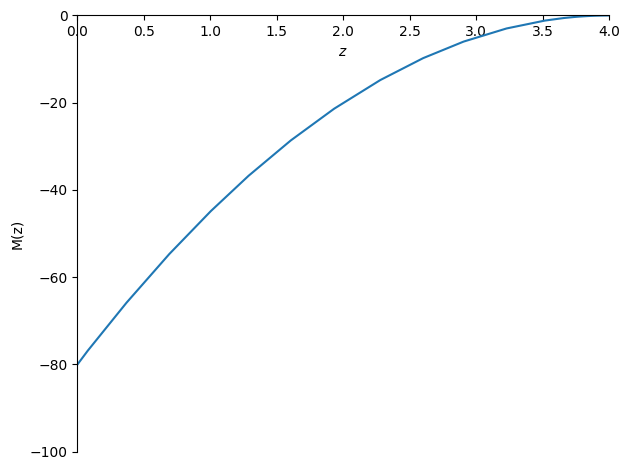

In [163]:
sympy.plot(M_z.subs({L:4, q:10}),xlim=(0,4),ylim=(-100,0),ylabel='M(z)')

## Hyperstatic structure

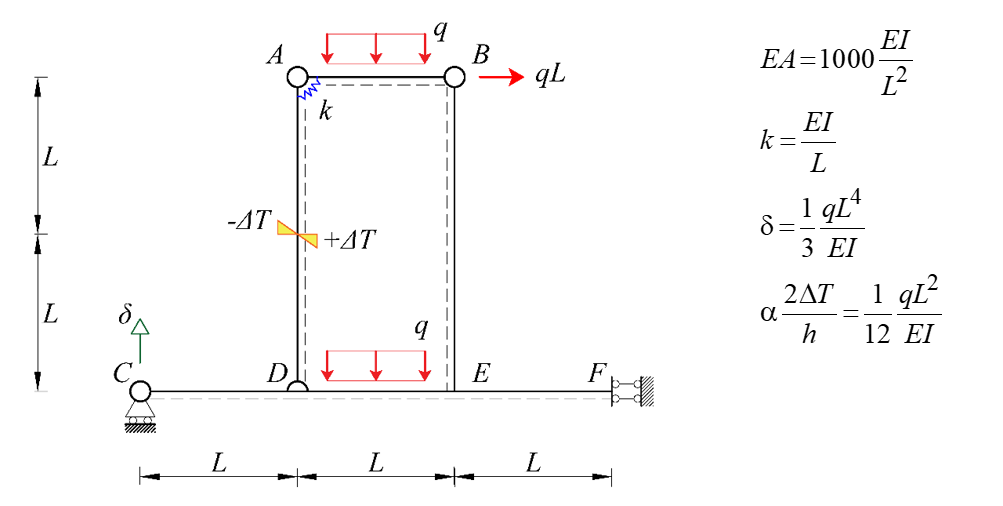

The hyperstatic force is considered the moment applied by the internal spring in $A$.

In [164]:
from IPython.display import display

In [165]:
q, L, z = sympy.symbols('q,L,z')
EA, GK, EI = sympy.symbols('EA, GK, EI')
X1 = sympy.symbols('X1')

In [166]:
M0 = [q*L/2*z-q*z**2/2,                    # AB
     sympy.S(0),                           # DA
     +q*L*z,                               # BE
     2*q*L*z,                              # CD
     2*q*L**2+sympy.S(3)/2*q*L*z-q*z**2/2, # DE
     5*q*L**2]                             # EF

M1 = [1-1/L*z,                             # AB
     sympy.S(1)/2/L*z,                     # DA
     -sympy.S(1)/2/L*z,                    # BE
     sympy.S(0),                           # CD
     1/L*z,                                # DE
     sympy.S(0)]                           # EF

Lk = [L,
      2*L,
      2*L,
      L,
      L,
      L]

In [167]:
n10 = 0
n11 = 0
for k in range(len(M0)):
    n10 = (n10 + sympy.integrate(M0[k]*M1[k]/EI,(z,0,Lk[k])))
    n11 = (n11 + sympy.integrate(M1[k]*M1[k]/EI,(z,0,Lk[k])))
display(n10)
display(n11)

L**3*q/(12*EI)

2*L/EI

In [168]:
a2Dt_h = sympy.S(1)/12*q*L**2/EI
k = 2 # asta con variazioni termiche
n1t = sympy.integrate(M1[k]*a2Dt_h,(z,0,Lk[k]))
display(n1t)

-L**3*q/(12*EI)

In [169]:
X1 = sympy.symbols('X1')
k = EI/L
n1 = -X1/k
sol = sympy.solve([(n10+X1*n11+n1t-n1)],[X1])
X1 = sol[X1]
# X1 = limit(X1,k,0)
display(X1)

0

## Elementary oscillator

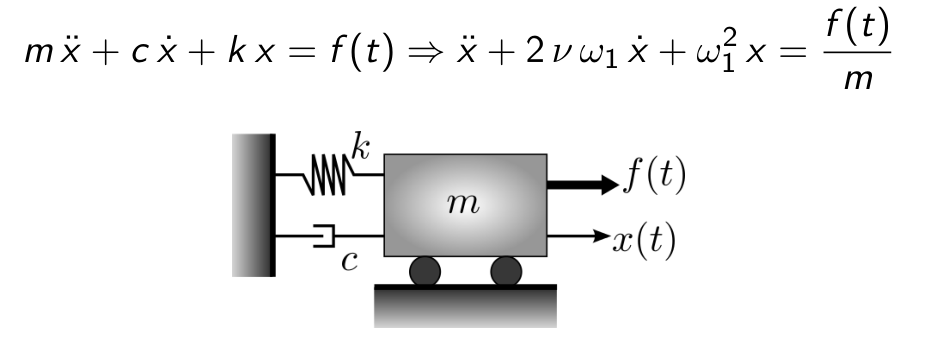

with $f(t) = \sin(\omega_o\,t)$

---

#### Euler formulas

In [170]:
y = sympy.symbols("y", real=True)

In [171]:
euler = {sympy.exp(I*y): sympy.cos(y)+I*sympy.sin(y), sympy.exp(-I*y): sympy.cos(y)-I*sympy.sin(y)}

---

In [172]:
t, m, k, c, v, w, w0 = sympy.symbols("t, m, k, c, \\nu, \\omega_1, \\omega_0", real=True, positive=True)
f = sympy.Function("f",real=True)(t)

In [173]:
sol = sympy.dsolve(sympy.Derivative(f,t,2)+2*v*w*sympy.Derivative(f,t)+w**2*f-1/m*sympy.sin(w0*t),
                   f,
                   ics={f.subs(t,0):0, f.diff(t).subs(t,0):0})
sol

Eq(f(t), -2*\nu*\omega_0*\omega_1*cos(\omega_0*t)/(m*(4*\nu**2*\omega_0**2*\omega_1**2 + \omega_0**4 - 2*\omega_0**2*\omega_1**2 + \omega_1**4)) - \omega_0**2*sin(\omega_0*t)/(m*(4*\nu**2*\omega_0**2*\omega_1**2 + \omega_0**4 - 2*\omega_0**2*\omega_1**2 + \omega_1**4)) + \omega_1**2*sin(\omega_0*t)/(m*(4*\nu**2*\omega_0**2*\omega_1**2 + \omega_0**4 - 2*\omega_0**2*\omega_1**2 + \omega_1**4)) + (-2*\nu**2*\omega_0*\omega_1**2/(8*\nu**2*\omega_0**2*\omega_1**3*m*sqrt(\nu - 1)*sqrt(\nu + 1) + 2*\omega_0**4*\omega_1*m*sqrt(\nu - 1)*sqrt(\nu + 1) - 4*\omega_0**2*\omega_1**3*m*sqrt(\nu - 1)*sqrt(\nu + 1) + 2*\omega_1**5*m*sqrt(\nu - 1)*sqrt(\nu + 1)) + 2*\nu*\omega_0*\omega_1**2*sqrt(\nu - 1)*sqrt(\nu + 1)/(8*\nu**2*\omega_0**2*\omega_1**3*m*sqrt(\nu - 1)*sqrt(\nu + 1) + 2*\omega_0**4*\omega_1*m*sqrt(\nu - 1)*sqrt(\nu + 1) - 4*\omega_0**2*\omega_1**3*m*sqrt(\nu - 1)*sqrt(\nu + 1) + 2*\omega_1**5*m*sqrt(\nu - 1)*sqrt(\nu + 1)) - \omega_0**3/(8*\nu**2*\omega_0**2*\omega_1**3*m*sqrt(\nu - 1)*sq

Solution with $\nu=0$

In [174]:
sol.rhs.subs(v,0)

-\omega_0**2*sin(\omega_0*t)/(m*(\omega_0**4 - 2*\omega_0**2*\omega_1**2 + \omega_1**4)) + \omega_1**2*sin(\omega_0*t)/(m*(\omega_0**4 - 2*\omega_0**2*\omega_1**2 + \omega_1**4)) + (-\omega_0**3/(2*I*\omega_0**4*\omega_1*m - 4*I*\omega_0**2*\omega_1**3*m + 2*I*\omega_1**5*m) + \omega_0*\omega_1**2/(2*I*\omega_0**4*\omega_1*m - 4*I*\omega_0**2*\omega_1**3*m + 2*I*\omega_1**5*m))*exp(-I*\omega_1*t) + (I*\omega_0**3/(-2*\omega_0**4*\omega_1*m + 4*\omega_0**2*\omega_1**3*m - 2*\omega_1**5*m) - I*\omega_0*\omega_1**2/(-2*\omega_0**4*\omega_1*m + 4*\omega_0**2*\omega_1**3*m - 2*\omega_1**5*m))*exp(I*\omega_1*t)

In [175]:
sol.rhs.subs(v,0).subs(w*t,y).subs(euler).simplify().subs(y,w*t)

(\omega_0*sin(\omega_1*t) - \omega_1*sin(\omega_0*t))/(\omega_1*m*(\omega_0**2 - \omega_1**2))

In [176]:
str(sol.rhs.subs(v,0))

'-\\omega_0**2*sin(\\omega_0*t)/(m*(\\omega_0**4 - 2*\\omega_0**2*\\omega_1**2 + \\omega_1**4)) + \\omega_1**2*sin(\\omega_0*t)/(m*(\\omega_0**4 - 2*\\omega_0**2*\\omega_1**2 + \\omega_1**4)) + (-\\omega_0**3/(2*I*\\omega_0**4*\\omega_1*m - 4*I*\\omega_0**2*\\omega_1**3*m + 2*I*\\omega_1**5*m) + \\omega_0*\\omega_1**2/(2*I*\\omega_0**4*\\omega_1*m - 4*I*\\omega_0**2*\\omega_1**3*m + 2*I*\\omega_1**5*m))*exp(-I*\\omega_1*t) + (I*\\omega_0**3/(-2*\\omega_0**4*\\omega_1*m + 4*\\omega_0**2*\\omega_1**3*m - 2*\\omega_1**5*m) - I*\\omega_0*\\omega_1**2/(-2*\\omega_0**4*\\omega_1*m + 4*\\omega_0**2*\\omega_1**3*m - 2*\\omega_1**5*m))*exp(I*\\omega_1*t)'